## Collect Tweets from particular geocode location in Google map
https://tinyurl.com/nh26dkkn

# 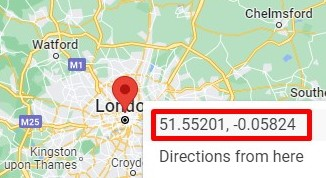

In [30]:
import csv
import pandas as pd
import os
import re
import string
import snscrape.modules.twitter as sntwitter
import tweepy
import matplotlib.pyplot as plt

# A. Collect Tweets Without API: with snscrape
#pip3 install snscrape

In [17]:
#Create and append to csv file and then write tweets into csv file
tweet_data = open('London_tweets_sns.csv', 'a', newline='', encoding='utf8')
csv.writer(tweet_data).writerow(['username','tweet','hashtags']) 

#Radius around 30 km around particular geocode
max_tweets = 50
for n,tweet in enumerate(sntwitter.TwitterSearchScraper('geocode:51.55201,-0.05824,30km \
        + since:2022-07-14 until:2022-07-15 lang:en -filter:links -filter:replies').get_items()):
    if n > max_tweets:
        break
    csv.writer(tweet_data).writerow([tweet.user.username, tweet.content, tweet.hashtags])      
tweet_data.close()

In [18]:
df = pd.read_csv('London_tweets_sns.csv')
df=df.dropna(subset = ['hashtags']) #Only use tweets which contained hashtags
df.head()

,username,tweet,hashtags
5,London_Taye,Everyday staff meeting with Danica. #LoveIsland,['LoveIsland']
15,Diplomacy140,“Moldovan President @sandumaiamd said that #Mo...,"['Moldova', 'gas', 'Russia', 'Ukraine']"
20,mirzawaheedbaig,PLEASE stope bieng Brutal and let @ImranRiazKh...,['ImranRiazKhanPoisoned']
31,Knowthegospel,Begin to command every virus in your surroundi...,['ChristianPrayer']
37,muckymac,Wish danica would stop talking to guys like th...,['LoveIsland']


# B. Collect Tweets  With API: with tweepy

# Twitter Developer API

In [19]:
#https://developer.twitter.com/en/portal/dashboard

API_KEY = 'JYW7WsKbVLqOnhJZd4Kqfwtfk'
API_SECRET = 'sPAUmw4DQhnb4aGmZD1B8On7Z8SJzegycAfQEM9wGL3GFwx4ni'
ACCESS_TOKEN = '900524114976296960-vBIQ0CoAWvP4kfSctnB3ejV5bJpNMqw'
ACCESS_TOKEN_SECRET = 'egd1tOSY0LYKB1fxjPTBCvPPtYMIhJmlAI6HZ7Z09Zv7j'

a = tweepy.OAuthHandler(API_KEY, API_SECRET)
a.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
API = tweepy.API(a)

In [20]:
csvFile = open("london_tweets_tweepy.csv", "a+",newline="", encoding = "utf-8")
csvWriter = csv.writer(csvFile)
l = [] #location
u = [] #username
t = [] #tweet text
h = [] #hashtags

max_tweets = 50
n = 0  
for tweet in (API.search_tweets('geocode:51.53416,-0.10734,30km', lang='en',count=50, \
                    since_id="2022-07-13", until='2022-07-15')):
    print(tweet.created_at, tweet.id, tweet.user.name,tweet.text)
    l.append(tweet.user.location)
    u.append(tweet.user.name)
    t.append(tweet.text.encode("utf-8"))
    h.append(tweet.entities['hashtags'])    
    n += 1  
    
    if n > max_tweets:
        break
          
    tweets=[tweet.created_at, tweet.id,tweet.user.location,tweet.user.name,
            tweet.text.encode("utf-8"),tweet.entities['hashtags']]
    csvWriter.writerow(tweets)

dictTweets = {"location":l,"username":u,"tweet":t, "hashtags": h}

csvFile.close()

2022-07-14 23:59:58+00:00 1547732670553026561 Teda Bara hello, it so happened that I did such a thing ahahaha #art #csgo #csgoart #illustration https://t.co/bgX02Kmx77
2022-07-14 23:59:58+00:00 1547732669227618305 Clifton Alexander I won 15 achievements in 2 games for 519 points on #TrueAchievements https://t.co/SUo7M6VqYf
2022-07-14 23:59:57+00:00 1547732663800193027 Oliver Levinge @GBNEWS Kemi is the only real choice. All the rest are tainted , compromised, too fragile, or just not bright enoug… https://t.co/op1KBQHjkt
2022-07-14 23:59:56+00:00 1547732660344131588 Jean @merry123459 @MgS_2011 @JeanCharest_ I thought Jean Charest was a progressive conservative candidate. Apparently th… https://t.co/EjLvQIEqZc
2022-07-14 23:59:56+00:00 1547732659807272962 David Hill 🇺🇦 One day I'm actually going to be really good at Laravel. 

But until that day I'm just gonna keep writing really ba… https://t.co/xdfW2yiASN
2022-07-14 23:59:56+00:00 1547732659148795905 💪Lean4Life If you need to soon hav

In [21]:
df = pd.DataFrame(dictTweets, columns=["location","username","tweet","hashtags"])
df.head()

,location,username,tweet,hashtags
0,"London, England",Teda Bara,"b'hello, it so happened that I did such a thin...","[{'text': 'art', 'indices': [54, 58]}, {'text'..."
1,london,Clifton Alexander,b'I won 15 achievements in 2 games for 519 poi...,"[{'text': 'TrueAchievements', 'indices': [51, ..."
2,Near London,Oliver Levinge,b'@GBNEWS Kemi is the only real choice. All th...,[]
3,MTL,Jean,b'@merry123459 @MgS_2011 @JeanCharest_ I thoug...,[]
4,London,David Hill 🇺🇦,"b""One day I'm actually going to be really good...",[]


In [22]:
len(df)

49

In [23]:
def cleaning(tweets_data):   
    tweets_data = str(tweets_data).lower()
    tweets_data = re.sub('\[.*?\]', '', tweets_data)
    tweets_data = re.sub('https?://\S+|www\.\S+', '', tweets_data)  
    tweets_data = re.sub('\n', '', tweets_data)
    tweets_data = re.sub('<.*?>+', '', tweets_data)
    tweets_data = re.sub('[%s]' % re.escape(string.punctuation), '', tweets_data)
    tweets_data = re.sub('\w*\d\w*', '', tweets_data)   
    return tweets_data

def clean(tweets_data):   
    tweets_data = str(tweets_data).lower()
    tweets_data = re.sub("['']", '', tweets_data)
    return tweets_data

df['Cleaned_Tweets'] = df['tweet'].apply(cleaning)
df['Cleaned_Hashtags'] = df['hashtags'].apply(clean)
df.head(8)

,location,username,tweet,hashtags,Cleaned_Tweets,Cleaned_Hashtags
0,"London, England",Teda Bara,"b'hello, it so happened that I did such a thin...","[{'text': 'art', 'indices': [54, 58]}, {'text'...",bhello it so happened that i did such a thing ...,"[{text: art, indices: [54, 58]}, {text: csgo, ..."
1,london,Clifton Alexander,b'I won 15 achievements in 2 games for 519 poi...,"[{'text': 'TrueAchievements', 'indices': [51, ...",bi won achievements in games for points on ...,"[{text: trueachievements, indices: [51, 68]}]"
2,Near London,Oliver Levinge,b'@GBNEWS Kemi is the only real choice. All th...,[],bgbnews kemi is the only real choice all the r...,[]
3,MTL,Jean,b'@merry123459 @MgS_2011 @JeanCharest_ I thoug...,[],jeancharest i thought jean charest was a pro...,[]
4,London,David Hill 🇺🇦,"b""One day I'm actually going to be really good...",[],bone day im actually going to be really good a...,[]
5,"London, England",💪Lean4Life,b'If you need to soon have popularity and just...,[],bif you need to soon have popularity and just ...,[]
6,London,Malcolm Bacchus,b'@newscientist Alcohol can do that.',[],bnewscientist alcohol can do that,[]
7,"London, England",Victor Frankenstein,"b'Sugar becomes a liquid when heated, and when...",[],bsugar becomes a liquid when heated and when s...,[]


In [24]:
df.drop(['location','tweet','hashtags'], axis=1, inplace=True)
df.head()

,username,Cleaned_Tweets,Cleaned_Hashtags
0,Teda Bara,bhello it so happened that i did such a thing ...,"[{text: art, indices: [54, 58]}, {text: csgo, ..."
1,Clifton Alexander,bi won achievements in games for points on ...,"[{text: trueachievements, indices: [51, 68]}]"
2,Oliver Levinge,bgbnews kemi is the only real choice all the r...,[]
3,Jean,jeancharest i thought jean charest was a pro...,[]
4,David Hill 🇺🇦,bone day im actually going to be really good a...,[]


## Pre-processing, Cleaning

In [25]:
htag_Texts=df['Cleaned_Hashtags'].values
Tweets_String=str(htag_Texts)
htag_Texts_Cleaned = Tweets_String.lower()
htag_Texts_Cleaned=re.sub(r'@\w+', ' ', htag_Texts_Cleaned)
htag_Texts_Cleaned=re.sub(r'http\S+', ' ', htag_Texts_Cleaned) 
htag_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',htag_Texts_Cleaned)
htag_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', htag_Texts_Cleaned)
htag_Texts_Cleaned= re.sub(r' +', ' ', htag_Texts_Cleaned)
htag_Texts_Cleaned= re.sub(r' text', ' ', htag_Texts_Cleaned)
print("Cleaned hashtags:" + "\n" + htag_Texts_Cleaned)


Cleaned hashtags: 
  art indices  csgo indices  csgoart indices  illustration indices  trueachievements indices  chelseafollowtrain indices  cfc indices  loveisland indices  blastindieradio indices 


In [39]:
df.isnull().sum()

username            0
Cleaned_Tweets      0
Cleaned_Hashtags    0
dtype: int64

In [26]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

hashtag_count = word_count(htag_Texts_Cleaned)
print(hashtag_count)

{'art': 1, 'indices': 9, 'csgo': 1, 'csgoart': 1, 'illustration': 1, 'trueachievements': 1, 'chelseafollowtrain': 1, 'cfc': 1, 'loveisland': 1, 'blastindieradio': 1}


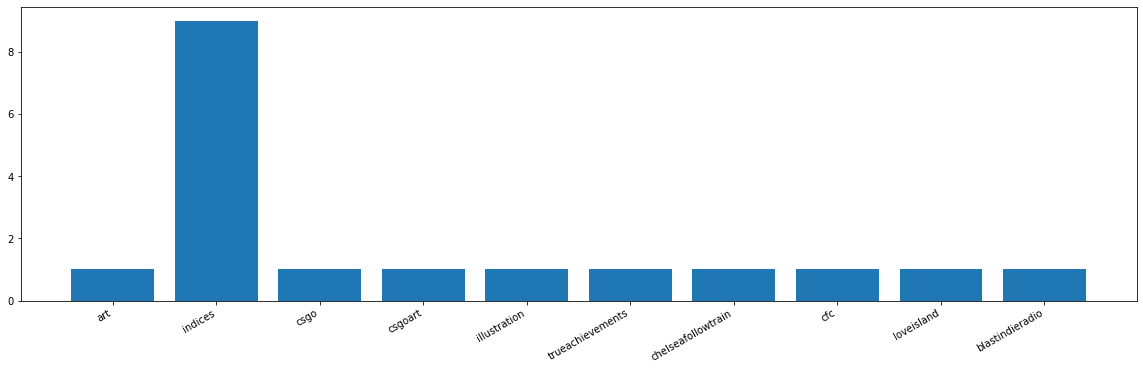

In [32]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(20, 6))
ax1.bar(hashtag_count.keys(), hashtag_count.values())
fig.autofmt_xdate()
plt.savefig('hashtag_count_graph.jpeg')
plt.show()

# 5 Most Popular hastags

In [33]:
MostPopularHashtags = sorted(hashtag_count, key=hashtag_count.get, reverse=True)[:5]
print(MostPopularHashtags)

['indices', 'art', 'csgo', 'csgoart', 'illustration']


# 5 Most Active Users

In [34]:
#df['user'].unique()
userlist = df['username'].value_counts()
most_active_users = userlist.head(5)
most_active_users

💪Lean4Life           2
Teda Bara            1
Julie L. Crickman    1
Ben Rigby            1
iTunesGad            1
Name: username, dtype: int64

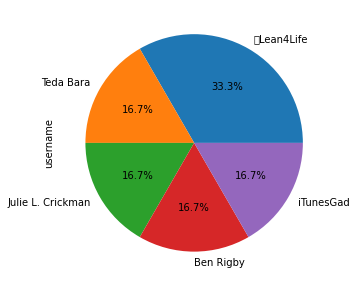

In [38]:
plot_users=most_active_users.plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.rc('axes', unicode_minus=False)
plt.savefig("MostActiveUser_chart.jpeg",transparent=False, bbox_inches='tight',pad_inches=0.1)

# Twitter Trending Now

In [ ]:
#https://www.woeids.com/ # WOEID of London
woeid = 44418
trendingnow = API.get_place_trends(id = woeid)
print("Trending now in London:")
 
for trend in trendingnow:
    trends = []
    for tr in trend['trends']:
        trends.append(tr['name'])
print(trends)    

In [ ]:
#Create and append to csv file and then write tweets into csv file
tweet_data = open('London_tweets_tweepy.csv', 'a', newline='', encoding='utf8')
csv.writer(tweet_data).writerow(['username','tweet', 'location', 'hashtags']) 

#Radius around 20 km around particular geocode
max_tweets = 100
date_since = "2022-07-01"
date_until = "2022-07-14"
for n,tweet in enumerate(API.search_tweets('geocode:51.53416,-0.10734,30km', lang='en',\
                                          since_id = 'date_since')):
    if n > max_tweets:
        break
    csv.writer(tweet_data).writerow([tweet.user.screen_name, tweet.text, tweet.user.location, \
                                     tweet.entities['hashtags']])       
tweet_data.close()

dfA = pd.read_csv('London_tweets_tweepy.csv')
#dfA = dfA.dropna(subset = ['hashtags']) #Only use tweets which contained hashtags
dfA.head(15)

# Search for particular key

In [ ]:
search_key = "BorisJohnson"
csvFile = open(search_key+".csv", "a+",newline="", encoding = "utf-8")
csvWriter = csv.writer(csvFile)
c = [] #date creted
i = [] #id of tweet
l = [] #location
u = [] #username
t = [] #text
h = [] #hashtags

max_tweets = 10
n = 0
for tweet in tweepy.Cursor(API.search_tweets, q=search_key, lang="en",since_id="2022-07-14", 
                           until='2022-07-15').items():
    print(tweet.created_at, tweet.id, tweet.user.name,tweet.text)
    c.append(tweet.created_at)
    i.append(tweet.id)
    l.append(tweet.user.location)
    u.append(tweet.user.name)
    t.append(tweet.text.encode("utf-8"))
    h.append(tweet.entities['hashtags'])
    n += 1    
    
    if n > max_tweets:
        break
          
    tweets=[tweet.created_at, tweet.id,tweet.user.location,tweet.user.name,
            tweet.text.encode("utf-8"),tweet.entities['hashtags']]
    csvWriter.writerow(tweets)

dictTweets = {"time":c, "id":i,"location":l,"username":u,"text":t, "hashtags": h}

csvFile.close()

In [ ]:
df = pd.DataFrame(dictTweets, columns=["location","username","text", "hashtags"])
df.head()

In [ ]:
import pandas as pd
import tweepy
 
# function to display data of each tweet
def printtweetdata(n, ith_tweet):
        print()
        print(f"Tweet {n}:")
        print(f"Username:{ith_tweet[0]}")
        print(f"Description:{ith_tweet[1]}")
        print(f"Location:{ith_tweet[2]}")
        print(f"Following Count:{ith_tweet[3]}")
        print(f"Follower Count:{ith_tweet[4]}")
        print(f"Total Tweets:{ith_tweet[5]}")
        print(f"Retweet Count:{ith_tweet[6]}")
        print(f"Tweet Text:{ith_tweet[7]}")
        print(f"Hashtags Used:{ith_tweet[8]}")
 
 
# function to perform data extraction
def scrape(words, date_since, numtweet):
 
        # Creating DataFrame using pandas
        db = pd.DataFrame(columns=['username',
                                   'description',
                                   'location',
                                   'following',
                                   'followers',
                                   'totaltweets',
                                   'retweetcount',
                                   'text',
                                   'hashtags'])
 
        # We are using .Cursor() to search
        # through twitter for the required tweets.
        # The number of tweets can be
        # restricted using .items(number of tweets)
        tweets = tweepy.Cursor(api.search_tweets,
                               words, lang="en",
                               since_id=date_since,
                               tweet_mode='extended').items(numtweet)
 
 
        # .Cursor() returns an iterable object. Each item in
        # the iterator has various attributes
        # that you can access to
        # get information about each tweet
        list_tweets = [tweet for tweet in tweets]
 
        # Counter to maintain Tweet Count
        i = 1
 
        # we will iterate over each tweet in the
        # list for extracting information about each tweet
        for tweet in list_tweets:
                username = tweet.user.screen_name
                description = tweet.user.description
                location = tweet.user.location
                following = tweet.user.friends_count
                followers = tweet.user.followers_count
                totaltweets = tweet.user.statuses_count
                retweetcount = tweet.retweet_count
                hashtags = tweet.entities['hashtags']
 
                # Retweets can be distinguished by
                # a retweeted_status attribute,
                # in case it is an invalid reference,
                # except block will be executed
                try:
                        text = tweet.retweeted_status.full_text
                except AttributeError:
                        text = tweet.full_text
                hashtext = list()
                for j in range(0, len(hashtags)):
                        hashtext.append(hashtags[j]['text'])
 
                # Here we are appending all the
                # extracted information in the DataFrame
                ith_tweet = [username, description,
                             location, following,
                             followers, totaltweets,
                             retweetcount, text, hashtext]
                db.loc[len(db)] = ith_tweet
 
                # Function call to print tweet data on screen
                printtweetdata(i, ith_tweet)
                i = i+1
        filename = 'scraped_tweets.csv'
 
        # we will save our database as a CSV file.
        db.to_csv(filename)
 
if __name__ == '__main__':
 
        # Enter your own credentials obtained
        # from your developer account
        consumer_key = "XXXXXXXXXXXXXXXXXXXXX"
        consumer_secret = "XXXXXXXXXXXXXXXXXXXXX"
        access_key = "XXXXXXXXXXXXXXXXXXXXX"
        access_secret = "XXXXXXXXXXXXXXXXXXXXX"
 
 
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_key, access_secret)
        api = tweepy.API(auth)
 
        # Enter Hashtag and initial date
        print("Enter Twitter HashTag to search for")
        words = input()
        print("Enter Date since The Tweets are required in yyyy-mm--dd")
        date_since = input()
 
        # number of tweets you want to extract in one run
        numtweet = 100
        scrape(words, date_since, numtweet)
        print('Scraping has completed!')

In [ ]:
import numpy as np
import tweepy
import snscrape.modules.twitter as sntwitter
import csv
import string
from collections import Counter
#nltk.download()
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib as mpl
import csv
import matplotlib.pyplot as plt
import re

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import snscrape.modules.twitter as sntwitter
import itertools
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import re
import string

## Sentiment Analysis with nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

In [ ]:
df1 = df.drop(columns = ['username','hashtags'])
df1.head(5)

In [ ]:
#df1.value_counts()
sid.polarity_scores(df1.loc[0]['tweet'])

In [ ]:
df1.dropna(inplace=True)
blanks = []  
for i,lb,rv in df.itertuples():  
    if type(rv)==str:            
        if rv.isspace():         
            blanks.append(i)  
df1.drop(blanks, inplace=True)

In [ ]:
#df1['tweet'].value_counts()
df1['score'] = df1['tweet'].apply(lambda review: sid.polarity_scores(review))
df1['compound']  = df1['score'].apply(lambda score_dict: score_dict['compound'])
df1['sentiment'] = df1['compound'].apply(lambda c: 'positive' if c >=0 else 'negative')
df1.head(10)

In [ ]:
df1['tweet'][1]

In [ ]:
df1['tweet'][9]

# Topic extraction with LDA (Latent Dirichlet Allocation)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(min_df=1,max_df=0.9,stop_words='english')
dm = countv.fit_transform(df1['tweet'])
dm

In [ ]:
#LDA
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5,random_state=42)
LDA.fit(dm)

In [ ]:
countv.get_feature_names()[1111]

In [ ]:
len(countv.get_feature_names())

In [ ]:
import random
for i in range(5):
    random_word_id = random.randint(0,1120)
    print(countv.get_feature_names()[random_word_id])

In [ ]:
for i in range(4):
    random_word_id = random.randint(0,1232)
    print(countv.get_feature_names()[random_word_id])

In [ ]:
LDA.components_

In [ ]:
len(LDA.components_[0])

In [ ]:
eachtopic = LDA.components_[0]

In [ ]:
eachtopic.argsort()

In [ ]:
eachtopic[183]

In [ ]:
# Top 5 words for this topic:
eachtopic.argsort()[-5:]

In [ ]:
word_top = eachtopic.argsort()[-5:]
for index in word_top:
    print(countv.get_feature_names()[index])

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'5 Most common discussed topic #{index}')
    print([countv.get_feature_names()[i] for i in topic.argsort()[-3:]])
    print('\n')

In [ ]:
dm

In [ ]:
dm.shape

In [ ]:
topic_res = LDA.transform(dm)

In [ ]:
topic_res.shape

In [ ]:
topic_res[0]

In [ ]:
topic_res[0].round(2)

In [ ]:
topic_res[0].argmax()

In [ ]:
df1.head()

In [ ]:
topic_res.argmax(axis=1)

In [ ]:
df1['Topic'] = topic_res.argmax(axis=1)

In [ ]:
df1.head(5)

# Topic Modeling using NMF (Non-Negative Matric Factorization)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=1, stop_words='english')
dm = tfidf.fit_transform(df1['tweet'])
dm

In [ ]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=5,random_state=42)
nmf_model.fit(dm)

In [ ]:
for index,topic in enumerate(nmf_model.components_):
    print(f'Most common discussed topic #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-3:]])
    print('\n')

In [ ]:
topic_res = nmf_model.transform(dm)
topic_res.argmax(axis=1)
df1['Topic'] = topic_res.argmax(axis=1)
df1.head(10)